**Heart-Disease-Prediction-ML-Model**

**Inspiration of the Project:**
Heart diseases ranks among the top killers worldwide. The World Health Organization (WHO) reports that heart-related conditions cause about 12 million deaths each year. In developed nations, including the United States, heart diseases account for half of all deaths. This scary fact shows how important it is to spot and treat heart problems .

Catching heart disease plays a key role in cutting down on complications. When doctors can spot high-risk patients, they can suggest lifestyle changes, prescribe medicines, or take other steps to prevent heart disease from starting or getting worse. This project aims to use machine learning models to predict a patient's risk of heart disease based on their medical data.

**Project Motivation:**

Find the key risk factors linked to heart disease.

Create models to predict if a patient has heart disease using their medical data.


In [641]:
# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier



# 7. Metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score,confusion_matrix, classification_report

#import pipeline
from sklearn.pipeline import Pipeline

# 9. Ignore warnings
import warnings
warnings.filterwarnings('ignore')



**Load the Dataset**

In [606]:
df = pd.read_csv("/content/heart_disease_uci (2).csv")

In [607]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Exploratory Data Analysis (EDA)**

Explore Each Column




In [608]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [609]:
# Checking the data shape
df.shape

(920, 16)

In [610]:
# Id column
df['id'].min(), df['id'].max()

(1, 920)

In [611]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

**Visualizations**

In [567]:
# lets summerize the age column
df['age'].describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


NO missing values in the column so we are good to go...

(i) Age Distribution

<Axes: xlabel='age', ylabel='Count'>

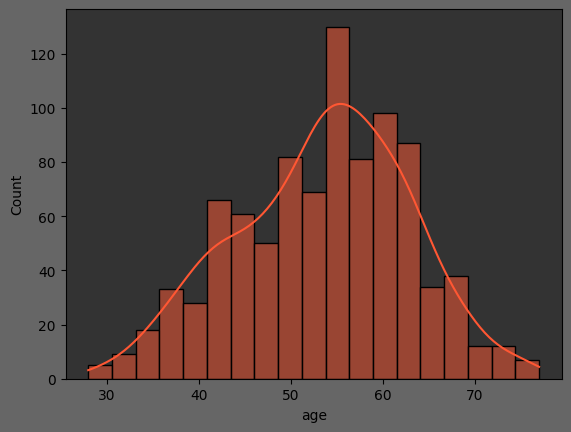

In [568]:
import seaborn as sns

# Plot the histogram
sns.histplot(df['age'], kde=True, color="#FF5733")


The age column distribution seems to be normaly distributed because we can clearly see the bill curve.

(ii)Plot the mean, Median and mode of age column using sns

Mean 53.51086956521739
Median 54.0
Mode 0    54
Name: age, dtype: int64


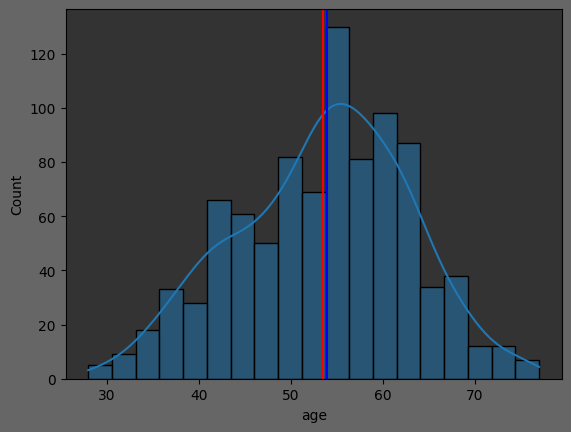

In [569]:

sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())


this providing a clear understanding of the distribution's central tendencies (mean, median, and mode).

**Lets explore the gender base distribution of the dataset for age column**

In [570]:
#stacked or grouped histogram histogram of age column using plotly and coloring this by sex
fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

Here we can  visualizes the distribution of the age column (on the x-axis) by counting the frequency of occurrences for each age value (y-axis).

In [571]:
# Find the values of sex column
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [572]:
male_count = 726
female_count = 194
total_count = male_count + female_count
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100


print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

Male percentage i the data: 78.91%
Female percentage in the data : 21.09%


In [573]:
#values count of age column grouping  by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

**Exploring the dataset column**

In [574]:
# find the unique values in the dataset column
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [612]:
# plot the countplot of dataset column
fig =px.bar(df, x='dataset', color='sex')
fig.show()

# print the values of dataset column groupes by sex
print (df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [614]:
# print the mean median and mode of age column grouped by dataset column
print ("Mean of the dataset: ",df.groupby('dataset')['age'].mean())
print ("Median of the dataset: ",df.groupby('dataset')['age'].median())
print ("Mode of the dataset: ",df.groupby('dataset')['age'].agg(pd.Series.mode))

# make a plot of age column using plotly and coloring by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

Mean of the dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median of the dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode of the dataset:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


Here we can visualizes the distribution of the age column (on the x-axis) by counting the frequency of occurrences for each age value (y-axis). age values for **dataset** column.

**Exploring CP (Chest Pain) column**

In [577]:
# value count of cp column classes
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


<Axes: xlabel='cp', ylabel='count'>

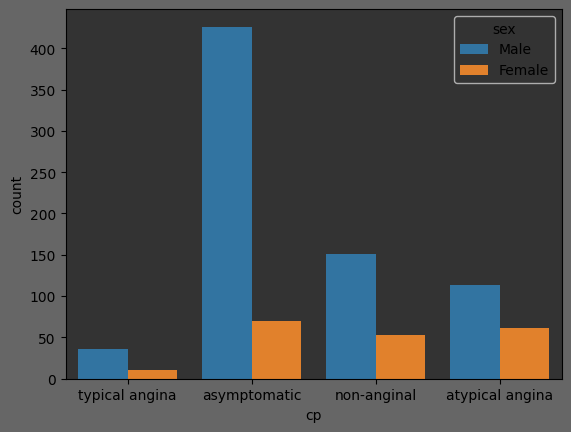

In [578]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

This represent the classes of data in Cp(Chest Pain) column  where **Lowest**is Typical angina **&** asymptomatic represent **large** class .

where sky --> male  
      orange-->female

<Axes: xlabel='cp', ylabel='count'>

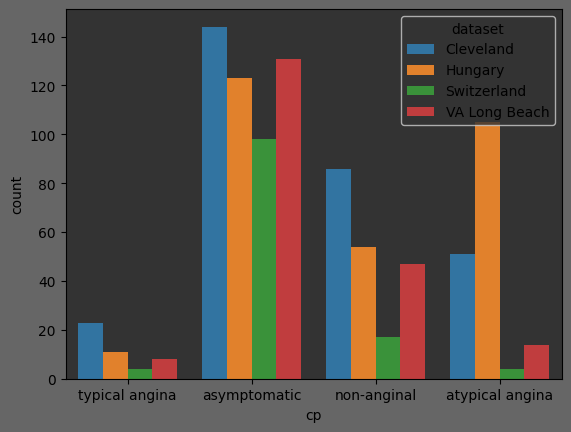

In [579]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='dataset')

This plot show count of  Cp column class  and dataset Column class . that represent the Cp in dataset set different clasees .

In [580]:
# Draw the plot of age column group by cp column
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

Here we can visualizes the distribution of the age column (on the x-axis) by counting the frequency of occurrences for each age value (y-axis). age values for cp column. where differnt colors show the classes of cp .

**Let's explore the trestbps (resting blood pressure) column:**

The normal resting blood pressure is 120/80 mm Hg.\
`Write here, what will happen if the blood pressure is high or low and then you canbin the data based on the those values.`

In [615]:
# lets summerize the trestbps column
df['trestbps'].describe()

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [617]:
# Handling missing values in trestbps column
df['trestbps'].isnull().sum()

59

In [618]:
# Impute the missing values of trestbps column using iterative imputer
# create an object of iteratvie imputer
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on trestbps column
imputer1.fit(df[['trestbps']])

# Transform the data
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")


Missing values in trestbps column: 0


Impute Missing values of other column

In [628]:
# let's see which columns has missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

,0
thal,52.826087
slope,33.586957
fbs,9.782609
exang,5.978261
restecg,0.217391
id,0.000000
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


There are : fbs,restecg,exang,slope,thal
all are categorical that have missing values

**Lets impute the missing values in thal column by using ML models**

All the coloumns are imputed which has floating data types and now lets impute the columns which has object data type.

* To handle the column having object data type we will use ML models.

In [630]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")

The missing values in thal column are: 486


In [631]:
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46



## Dealing with Missing  values (Categorical with Machine learning Models)

FInd the collumns with missing values and store in an object

FInd the Columns based on data type
Numeric columns.

Categorical Columns.
Boolean.

Define the function to impute missing values.

Apply the function to our dataset with missing values.

Check the missing values after imputation.
add Codeadd Markdown

In [634]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

,0
thal,486
slope,309
fbs,90
exang,55
restecg,2


In [635]:
missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [636]:
missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [645]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

**Imputing Missing Values with Machine learning model**

In [646]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [643]:
df.isnull().sum().sort_values(ascending=False)

,0
thal,486
slope,309
fbs,90
exang,55
restecg,2
id,0
age,0
sex,0
dataset,0
cp,0


In [647]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 0.0%
The feature 'fbs' has been imputed with 79.35 accuracy

Missing Values restecg : 0.0%
The feature 'restecg' has been imputed with 60.87 accuracy

Missing Values exang : 0.0%
The feature 'exang' has been imputed with 81.52 accuracy

Missing Values slope : 0.0%
The feature 'slope' has been imputed with 82.61 accuracy

Missing Values thal : 0.0%
The feature 'thal' has been imputed with 79.89 accuracy



In [649]:
df.isnull().sum().sort_values(ascending=False)


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


##Dealing With Outliers

>Let's create a box plots for all the numeric columns using for loop and subplot.


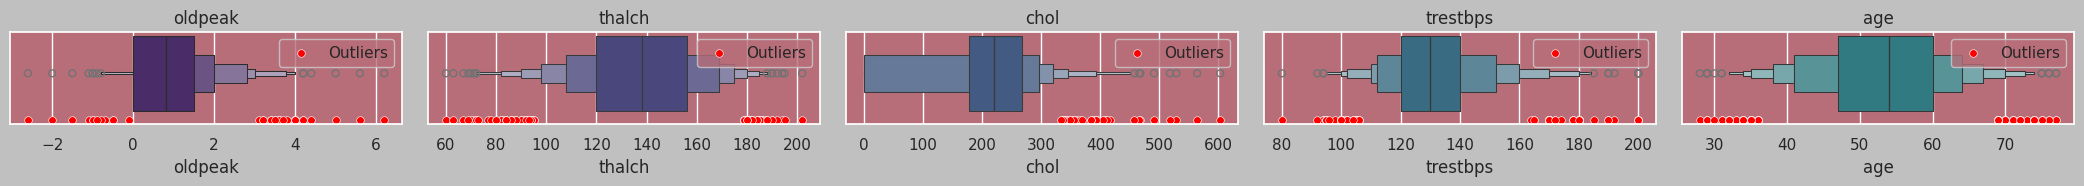

In [654]:
palette = sns.color_palette("viridis", 10)
plt.figure(figsize=(21,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 5, i + 1)
    # Plot the boxenplot
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])
    # Overlay the outliers using scatter plot
    outliers = df[(df[col] < df[col].quantile(0.05)) | (df[col] > df[col].quantile(0.95))]
    sns.scatterplot(x=outliers[col], y=[0.5]*len(outliers), color='red', s=30, label='Outliers', marker='o')

    plt.title(col)

plt.tight_layout()
plt.show()

**Explanation:**

**Outliers** identification: We define outliers as values outside the 5th and 95th percentile (you can adjust this).

Highlighting: ***Red dots*** (scatterplot) are used to mark outliers over the boxen plot.

**1. Handling Outliers in Trestbps column**

In [650]:
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.676375,reversable defect,3


In [651]:
# Remove the column because it is an outlier because trestbps cannot be zero.
df= df[df['trestbps']!=0]

**Let's see again to check the outliers:**

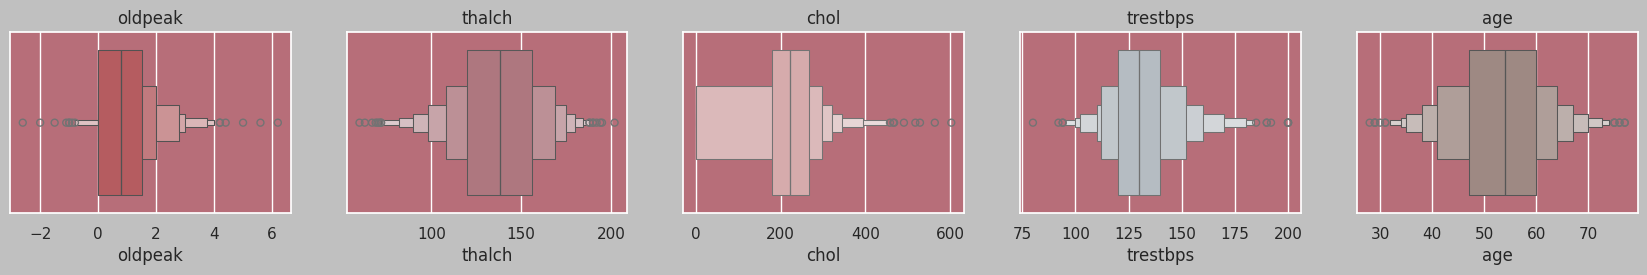

In [655]:
sns.set(rc={"axes.facecolor":"#B76E79","figure.facecolor":"#C0C0C0"})
modified_palette = ["#C44D53", "#B76E79", "#DDA4A5", "#B3BCC4", "#A2867E", "#F3AB60"]
cmap = ListedColormap(modified_palette)

plt.figure(figsize=(21,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,5, i+1)
    sns.boxenplot(x=df[col], color=modified_palette[i % len(modified_palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()

`Analysis of the plot`

According to the plot in the trestbps column there are some values which are too far from the data. but they are not outliers if we look the other attributes of the data

In [590]:
df.trestbps.describe()

,trestbps
count,860.000000
mean,132.286047
std,18.536175
min,80.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


 **2. Handling Oldpeak Outliers**

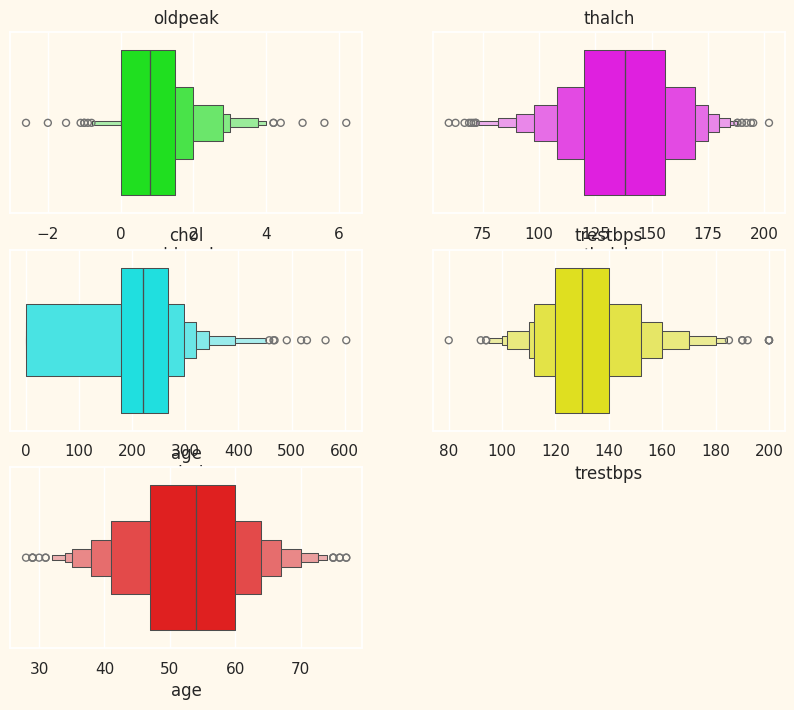

In [656]:
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
# "night vision" color palette
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

# Use the "night vision" palette for the plots
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxenplot(x=df[col], color=night_vision_palette[i % len(night_vision_palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()


`Analysis of the plot`

we can observe in the plot that -2 has removed.

`3. Handling Outliers in Age Column`

In [657]:
df.age.describe()

,age
count,919.000000
mean,53.509249
std,9.429689
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


`4. Handling trestbps column outliers`

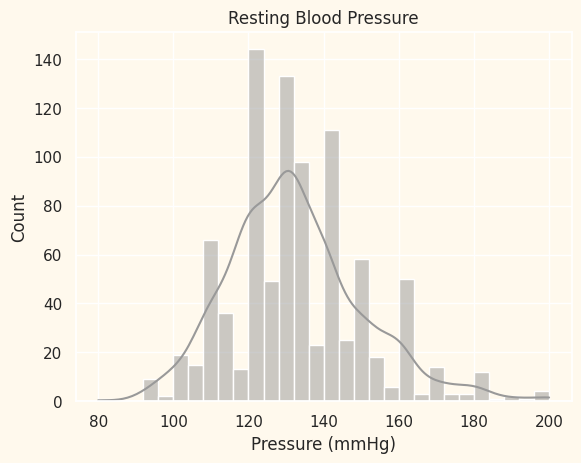

In [658]:
palette = ["#999999", "#666666", "#333333"]

sns.histplot(data=df,
             x='trestbps',
             kde=True,
             color=palette[0])

plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.style.use('default')
plt.rcParams['figure.facecolor'] = palette[1]
plt.rcParams['axes.facecolor'] = palette[2]


<Axes: xlabel='trestbps', ylabel='Count'>

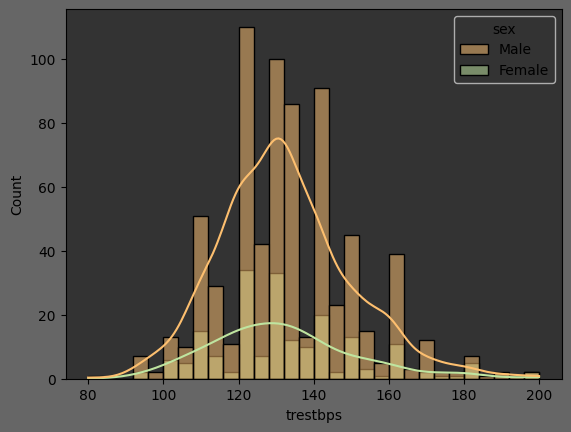

In [659]:
# create a histplot trestbops column to analyse with sex column
sns.histplot(df, x='trestbps', kde=True, palette = "Spectral", hue ='sex')

##### `Analysis of plot`



> * Everything seems ok and there is no outliers in the columns.
> * Columns are cleaned from outliers and missing values and we have already analysis the data.
> * The next step should be Model building.

#**Machine Learning Models**

some information about the target variable:

* `0 = no heart disease.`
* `1 = Mild Heart Disease types.`
* `2 = Moderate Heart Disease type.`
* `3 =  Severe Heart Disease type.`
* `4 =  Critical Heart Disease type.`

Now here is not missing values in my dataset

In [689]:
# split the data into X and y
X= df.drop('num', axis=1)
Target= df['num']
print(X.shape)
print(Target.shape)

(919, 15)
(919,)


In [665]:
# Task: Separate Encoder for all categorical and object columns and inverse transform at the end.
Label_Encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,Target,test_size=0.2, random_state=42)



**Checking Best Model for my dataset**

In [668]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),

    ('Support Vector Machine', SVC(random_state=42)),

    ('Naye base Classifier', GaussianNB())
]
best_model = None
best_accuracy = 0.0
#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])
#perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #print the performance metrics
    print("Model", name)
    print("Cross Validatino accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
# best model for my dataset
print("Best Model: ", best_model)

Model Logistic Regression
Cross Validatino accuracy:  0.5197278911564626
Test Accuracy:  0.483695652173913

Model Gradient Boosting
Cross Validatino accuracy:  0.619047619047619
Test Accuracy:  0.6413043478260869

Model KNeighbors Classifier
Cross Validatino accuracy:  0.580952380952381
Test Accuracy:  0.592391304347826

Model Decision Tree Classifier
Cross Validatino accuracy:  0.5741496598639456
Test Accuracy:  0.6413043478260869

Model AdaBoost Classifier
Cross Validatino accuracy:  0.5986394557823129
Test Accuracy:  0.5869565217391305

Model Random Forest
Cross Validatino accuracy:  0.6408163265306122
Test Accuracy:  0.6413043478260869

Model XGboost Classifier
Cross Validatino accuracy:  0.617687074829932
Test Accuracy:  0.5978260869565217

Model Support Vector Machine
Cross Validatino accuracy:  0.582312925170068
Test Accuracy:  0.5815217391304348

Model Naye base Classifier
Cross Validatino accuracy:  0.5659863945578232
Test Accuracy:  0.5434782608695652

Best Model:  Pipeline(s

Evaluate model

In [671]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6413043478260869
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.77      0.61      0.68        59
           2       0.36      0.35      0.36        23
           3       0.32      0.30      0.31        23
           4       0.17      0.50      0.25         4

    accuracy                           0.64       184
   macro avg       0.48      0.53      0.49       184
weighted avg       0.66      0.64      0.65       184

Confusion Matrix:
[[65  2  3  3  2]
 [ 9 36  5  7  2]
 [ 3  6  8  3  3]
 [ 4  3  6  7  3]
 [ 0  0  0  2  2]]


In [688]:
sensitivity = confusion_matrix(y_test, y_pred)[1, 1] / (confusion_matrix(y_test, y_pred)[1, 1] + confusion_matrix(y_test, y_pred)[1, 0])
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.6444444444444445


In [674]:
import joblib
# Save the model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [678]:
import pandas as pd
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Create input widgets
widgets_dict = {
    'ID': widgets.IntText(description='ID:'),
    'Age': widgets.IntText(description='Age:'),
    'Sex': widgets.Dropdown(description='Sex:', options=[('Male', 0), ('Female', 1)]),
    'Dataset': widgets.Dropdown(description='Dataset:', options=[('Cleveland', 0), ('Hungarian', 1)]),
    'Chest Pain': widgets.Dropdown(description='Chest Pain:', options=[('Typical', 0), ('Atypical', 1), ('Non-anginal', 2), ('Asymptomatic', 3)]),
    'Resting BP': widgets.IntText(description='Resting BP:'),
    'Cholesterol': widgets.IntText(description='Cholesterol:'),
    'FBS': widgets.Dropdown(description='Fasting Blood Sugar > 120 mg/dl:', options=[('False', 0), ('True', 1)]),
    'Resting ECG': widgets.Dropdown(description='Resting ECG:', options=[('Normal', 0), ('ST-T Abnormality', 1), ('Left Ventricular Hypertrophy', 2)]),
    'Max Heart Rate': widgets.IntText(description='Max Heart Rate:'),
    'Exang': widgets.Dropdown(description='Exercise Induced Angina:', options=[('No', 0), ('Yes', 1)]),
    'Oldpeak': widgets.FloatText(description='ST Depression:'),
    'Slope': widgets.Dropdown(description='Slope of ST Segment:', options=[('Upsloping', 0), ('Flat', 1), ('Downsloping', 2)]),
    'Major Vessels': widgets.Dropdown(description='Number of Major Vessels:', options=[('0', 0), ('1', 1), ('2', 2), ('3', 3)]),
    'Thalassemia': widgets.Dropdown(description='Thalassemia:', options=[('Normal', 0), ('Fixed Defect', 1), ('Reversible Defect', 2)])
}

# Create a button to trigger prediction
predict_button = widgets.Button(description='Predict Heart Disease')
output_widget = widgets.Output()

# Reasoning function
def get_prediction_reason(input_data):
    reasons = []
    if input_data['Age'] > 50: reasons.append(f"Age {input_data['Age']} is a risk factor.")
    if input_data['Cholesterol'] > 240: reasons.append(f"High cholesterol: {input_data['Cholesterol']} mg/dl.")
    if input_data['Chest Pain'] == 3: reasons.append("Asymptomatic chest pain is severe.")
    if input_data['Resting BP'] > 130: reasons.append(f"High BP: {input_data['Resting BP']} mmHg.")
    if input_data['Max Heart Rate'] < 120: reasons.append(f"Low max heart rate: {input_data['Max Heart Rate']} bpm.")
    if input_data['Exang'] == 1: reasons.append("Exercise induced angina present.")
    if input_data['FBS'] == 1: reasons.append("Fasting blood sugar > 120 mg/dl.")
    return reasons or ["No significant risk factors detected."]

# Prediction handler
def on_predict_button_clicked(b):
    with output_widget:
        clear_output()
        input_data = {key: widget.value for key, widget in widgets_dict.items()}
        input_df = pd.DataFrame([input_data])
        prediction = loaded_model.predict(input_df)[0]

        risk_levels = ["No Heart Disease", "Mild", "Moderate", "Severe", "Critical"]
        print(f"Prediction: {risk_levels[prediction]}")
        print("\nPossible Reasons:")
        for reason in get_prediction_reason(input_data):
            print(f"- {reason}")

# Attach the prediction handler to the button
predict_button.on_click(on_predict_button_clicked)

# Display widgets
display(*widgets_dict.values(), predict_button, output_widget)


IntText(value=0, description='ID:')

IntText(value=0, description='Age:')

Dropdown(description='Sex:', options=(('Male', 0), ('Female', 1)), value=0)

Dropdown(description='Dataset:', options=(('Cleveland', 0), ('Hungarian', 1)), value=0)

Dropdown(description='Chest Pain:', options=(('Typical', 0), ('Atypical', 1), ('Non-anginal', 2), ('Asymptomat…

IntText(value=0, description='Resting BP:')

IntText(value=0, description='Cholesterol:')

Dropdown(description='Fasting Blood Sugar > 120 mg/dl:', options=(('False', 0), ('True', 1)), value=0)

Dropdown(description='Resting ECG:', options=(('Normal', 0), ('ST-T Abnormality', 1), ('Left Ventricular Hyper…

IntText(value=0, description='Max Heart Rate:')

Dropdown(description='Exercise Induced Angina:', options=(('No', 0), ('Yes', 1)), value=0)

FloatText(value=0.0, description='ST Depression:')

Dropdown(description='Slope of ST Segment:', options=(('Upsloping', 0), ('Flat', 1), ('Downsloping', 2)), valu…

Dropdown(description='Number of Major Vessels:', options=(('0', 0), ('1', 1), ('2', 2), ('3', 3)), value=0)

Dropdown(description='Thalassemia:', options=(('Normal', 0), ('Fixed Defect', 1), ('Reversible Defect', 2)), v…

Button(description='Predict Heart Disease', style=ButtonStyle())

Output()

#**About Dataset**:



1. The minimum age to have a heart disease start from 28 years old.
2. Most of the people get heart disease at the age of 53 to 54 years.
3. Most of the males and females get are with heart disease at the age of 54 to 55 years.
4. Male percentage i the data: 78.91%
5. Female percentage in the data : 21.09%
6. Males are 274.23% more than female in the data.
7. We have the highest number of people from Clveland(304) and lowest from Switzerland (123).
   
  **Age vs Sex and origin**
   1. The highest number of female in this dataset are from Cleveland(97) and lowest are from VA Long Beach(6).
   2. The highest number of male are from Hungary(212) and lowest from Switzerland(113).
   
   **Chest pain according to Origins**
8. The high number of Typical angina, Asymptomatic and Non anginal chest pain is in the Cleveland while Atypical anigna is highly occured in Hungary.
9.  Lowest number of chest pain (Typical angina, Asymptomatic, Non anginal and Atypical angina)is happened in Switzerland as compare to other origins.
    
    **Chest pain according to Age**
10. The highest number of chest pain is happened is Asymtomatic Angina and the lowest number of cp is that happened is Typical Angina.
    1. The age in which highest number of `Typical Angina` happened is `62 to 63 years`.
    2. The age in which highest number of `Asymtomatic Angina` happened is `56 to 57 years`.
    3. The age in which highest number of `Non Anginal` happened is `54 to 55 years`.
    4. The age in which highest number of `Atypical Angina` happened is `54 to 55 years`.

#Conclusion:
**Data Preprocessing:**

--> We started by addressing missing values in the dataset using an IterativeImputer with a RandomForestRegressor.

--> We then identified and handled outliers in several features (e.g., trestbps, oldpeak) using visualizations (box plots) and domain expertise.

--> Categorical variables were encoded using Label Encoding to prepare them for model training.

**--> Model Selection for this particular dataset  and Training:**

--> A variety of classification models were evaluated using cross-validation and test accuracy:

(1) Model Logistic Regression
Cross Validatino accuracy:  0.5197278911564626
Test Accuracy:  0.483695652173913

(2) Model Gradient Boosting
Cross Validatino accuracy:  0.619047619047619
Test Accuracy:  0.6413043478260869

(3) Model KNeighbors Classifier
Cross Validatino accuracy:  0.580952380952381
Test Accuracy:  0.592391304347826

(4) Model Decision Tree Classifier
Cross Validatino accuracy:  0.5741496598639456
Test Accuracy:  0.6413043478260869

(5) Model AdaBoost Classifier
Cross Validatino accuracy:  0.5986394557823129
Test Accuracy:  0.5869565217391305

(5) Model Random Forest
Cross Validatino accuracy:  0.6408163265306122
Test Accuracy:  0.6413043478260869

(6)Model XGboost Classifier
Cross Validatino accuracy:  0.617687074829932
Test Accuracy:  0.5978260869565217

(7) Model Support Vector Machine
Cross Validatino accuracy:  0.582312925170068
Test Accuracy:  0.5815217391304348

(8) Model Naye base Classifier
Cross Validatino accuracy:  0.5659863945578232
Test Accuracy:  0.5434782608695652


**-->We Find Best Performing Model:**
> The Decision Tree Classifier achieved the best performance with an accuracy of: 0.5434782608695652

 -->And develop model using Decision tree Agorithm
**Confusion Matrix:**

[
  
  [59 11  2  3  0]

  [16 29  2 11  1]

  [ 1 12  3  4  3]

  [ 2  7  1  8  5]

  [ 0  0  0  3  1]
  
  ]

**Model Evaluation:**
> The model's accuracy provides a general overview of its performance.
> The confusion matrix provides more detailed insights into the model's ability to correctly classify each class and identify potential misclassifications.


